# **1.CNN(Convolution Neural Network)란?**
- 딥러닝의 가장 대표적인 방법으로, 이미지를 작은 특징에서 복잡한 특징으로 추상화하는 것이다.
- 3차원 이미지를 FC(Fully Conncected) 신경망으로 학습시키면 2,3차원의 데이터를 1차원으로 평면화시킴에 따라 이미지 공간 정보 유실이 일어나 학습이 비효율적으로 이루어질 수 있다.
- 이를 해결하기 위해, 이미지 공간 정보를 유지한 상태로 학습이 가능하게 하는 것이 'CNN'이다.

## CNN구조 (이미지 특징 추출 - 중간 부분 - 클래스 분류)
1) 이미지의 특징을 추출하는 부분
- Convolution layer: 입력 데이터에 필터를 적용하여 활성화 함수를 반영
- Pooling layer: ConvLayer의 크기를 줄이거나 특정 데이터를 강조하는 역할

2) 중간 부분
- Flatten layer: 이미지 형태의 데이터를 배열 형태로 변환

3) 클래스 분류하는 부분
- Fully connected layer

## [이미지 불러오기]

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import zipfile, os, shutil

dataset='/content/gdrive/My Drive/datasets/cats_and_dogs/train.zip'
dst_path='/content/gdrive/My Drive/datasets/cats_and_dogs/train'

In [ ]:
dst_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/train' # 원본 데이터셋을 압축 해제한 디렉터리 경로
base_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small' # 소규모 데이터셋을 저장할 디렉터리

In [ ]:
# 'cats_and_dogs_small' 폴더 안에 'train/val/test'폴더 생성
train_dir=os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir=os.path.join(base_dir, 'val')
os.mkdir(val_dir)

test_dir=os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# 원하는 경로에 폴더가 생성되어 있지 않으면, 직접 만들어준다.
from os import path

train_cats_dir=os.path.join(train_dir,'cats')
if not path.exists(train_cats_dir):
  os.mkdir(train_cats_dir)

train_dogs_dir=os.path.join(train_dir, 'dogs')
if not path.exists(train_dogs_dir):
  os.mkdir(train_dogs_dir)

val_cats_dir=os.path.join(val_dir, 'cats')
if not path.exists(val_cats_dir):
  os.mkdir(val_cats_dir)

val_dogs_dir=os.path.join(val_dir, 'dogs')
if not path.exists(val_dogs_dir):
  os.mkdir(val_dogs_dir)

test_cats_dir=os.path.join(test_dir, 'cats')
if not path.exists(test_cats_dir):
  os.mkdir(test_cats_dir)

test_dogs_dir=os.path.join(test_dir, 'dogs')
if not path.exists(test_dogs_dir):
  os.mkdir(test_dogs_dir)

## [train, val, test 이미지를 각각 1000개, 500개, 500개 생성하기]

In [ ]:
train_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small/train'
val_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small/val'
test_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small/test'

In [ ]:
train_cats_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small/train/cats'
train_dogs_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small/train/dogs'
val_cats_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small/val/cats'
val_dogs_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small/val/dogs'
test_cats_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small/test/cats'
test_dogs_dir='/content/gdrive/My Drive/datasets/cats_and_dogs/train/cats_and_dogs_small/test/dogs'

In [ ]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]        # dst_dir(원본 데이터셋을 압축 해제한 경로)에 있는 처음 1000개의 고양이 이미지를 train_cats_dir에 복사한다.
for fname in fnames:
  org_file=os.path.join(dst_dir, fname)
  copy_file=os.path.join(train_cats_dir, fname)
  shutil.copyfile(org_file, copy_file)

fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]   # 다음 500개의 고양이 이미지를 val_cats_dir에 복사한다.
for fname in fnames:
  org_file=os.path.join(dst_dir, fname)
  copy_file=os.path.join(val_cats_dir, fname)
  shutil.copyfile(org_file, copy_file)

fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]   # 마지막 500개의 고양이 이미지를 test_cats_dir에 복사한다.
for fname in fnames:
  org_file=os.path.join(dst_dir, fname)
  copy_file=os.path.join(test_cats_dir, fname)
  shutil.copyfile(org_file,copy_file)

In [ ]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]        # dst_dir(원본 데이터셋을 압축 해제한 경로)에 있는 처음 1000개의 강아지 이미지를 train_cats_dir에 복사한다.
for fname in fnames:
  org_file=os.path.join(dst_dir, fname)
  copy_file=os.path.join(train_dogs_dir, fname)
  shutil.copyfile(org_file, copy_file)

fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]   # 다음 500개의 강아지 이미지를 val_cats_dir에 복사한다.
for fname in fnames:
  org_file=os.path.join(dst_dir, fname)
  copy_file=os.path.join(val_dogs_dir, fname)
  shutil.copyfile(org_file, copy_file)
  
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]    # 마지막 500개의 강아지 이미지를 test_cats_dir에 복사한다.
for fname in fnames:
  org_file=os.path.join(dst_dir, fname)
  copy_file=os.path.join(test_dogs_dir, fname)
  shutil.copyfile(org_file,copy_file)

## [train, val, test 이미지 갯수 확인]

In [38]:
print('amounts of train cats image: ', len(os.listdir(train_cats_dir)))
print('amounts of train dogs image: ', len(os.listdir(train_dogs_dir)))
print('amounts of validation cats image: ', len(os.listdir(val_cats_dir)))
print('amounts of validation dogs image: ', len(os.listdir(val_dogs_dir)))
print('amounts of test cats image: ', len(os.listdir(test_cats_dir)))
print('amounts of test dogs image: ', len(os.listdir(test_dogs_dir)))

amounts of train cats image:  1000
amounts of train dogs image:  1000
amounts of validation cats image:  500
amounts of validation dogs image:  500
amounts of test cats image:  500
amounts of test dogs image:  500


## [네트워크: Conv2D + MaxPooling2D → Flatten → Dense]

In [57]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))    # 이미지의 크기를 (150,150) 크기로 네트워크를 만들었으므로, 밑에서 모든 이미지에 대해 (150,150) 사이즈로 크기를 바꿔줘야 한다 : 데이터 전처리 과정
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))    # 강아지인지, 고양이인지 분류해야 하므로 'sigmoid'를 사용한다.

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 128)      

(150,150) → (3,3) 크기의 필터로 convolution → (148,148)



*   Output Height : (H + 2P + FH) / S + 1 = 150 - 3 + 1 = 148
*   Output Width : (W + 2P+ FW) / S + 1 = 150 - 3 + 1 = 148




(None, 7, 7, 128) → Flatten → ( , 6272)


*   7 * 7 * 128 = 6272


*(padding = 'valid') : 패딩을 사용하지 않는다.

*(padding = 'same') : 입력과 동일한 높이와 넓이를 가진 출력을 만들기 위해 패딩한다.




In [59]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

## [데이터 전처리 과정]

In [55]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),  # 네트워크의 input shape과 동일하게 (150,150)으로 만들어준다.
    batch_size=20,
    class_mode='binary')    # 네트워크에서 binary_crossentropy loss를 사용하므로 이진 레이블이 필요하다.

validation_generator=test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.




*   픽셀값(0~255)의 스케일을 [0,1] 사이로 조정해주기위해서 (rescale=1./255) 을 해준다.


## [배치 제너레이터(train_generator, validation_generator)를 이용해서 모델 훈련하기]

In [60]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=validation_generator,
                            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 112s 1s/step - loss: 0.6885 - acc: 0.5240 - val_loss: 0.6790 - val_acc: 0.6280
Epoch 2/30
100/100 [==============================] - 107s 1s/step - loss: 0.6514 - acc: 0.6285 - val_loss: 0.6732 - val_acc: 0.5980
Epoch 3/30
100/100 [==============================] - 107s 1s/step - loss: 0.6001 - acc: 0.6815 - val_loss: 0.5423 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 107s 1s/step - loss: 0.5633 - acc: 0.7100 - val_loss: 0.6472 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 107s 1s/step - loss: 0.5314 - acc: 0.7340 - val_loss: 0.8000 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 112s 1s/step - loss: 0.5066 - acc: 0.7510 - val_loss: 0.5134 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4817 - acc: 0.7640 - val_loss: 0.6164 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 107s 1s/step - 



*   fit_generator은 입력과 타깃의 배치를 끝없이 반환한다.(데이터가 끝없이 생성됨)
- 그렇기 때문에, 하나의 epoch을 정의하기 위해 generator로부터 얼마나 많은 샘플을 뽑을 지 알려줘야 한다.

       train data(2000개)
       * batch_size=20 (20개의 샘플이 하나의 배치) → 100개(2000÷20)의 배치를 뽑아야 2,000개의 샘플을 모두 처리할 수 있다.
       * steps_per_epoch = 100

      validation data(1000개)
      * batch_size=20 (20개의 샘플이 하나의 배치) → 50개(1000÷20)의 배치를 뽑아야 1,000개의 샘플을 모두 처리할 수 있다.
      * validation_steps = 50

In [61]:
model.save('cats_and_dogs_small_1.h5')  # save(): 모델 구조와 가중치를 'h5' 파일 형식으로 모두 저장할 수 있는 함수이다.

<Figure size 432x288 with 0 Axes>

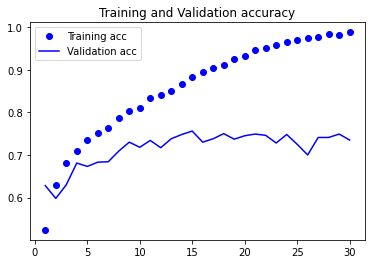

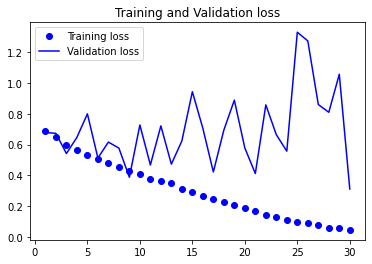

<Figure size 432x288 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()



## Overfitting(과대적합)이란?
- 과대적합은 학습할 샘플이 너무 적어, 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없어서 발생한다.
- 해결할 수 있는 단순한 방법은 샘플의 수를 증가시키는 것이다.
- 이를 위해, '데이터 증식'을 사용해서 기존 train 샘플로 부터 더 많은 train data 를 생성한다.









---



---




# **2. 데이터 증식(Data Augmentation)**
- 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플의 수를 늘리는 방법이다.
- train(훈련)할 때, 모델이 동일한 데이터를 중복해서 만나지 않도록 하는 것을 목표로 한다.

## [데이터 증식시키기] 

In [63]:
train_datagen_aug=ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,        # rotation_range : 랜덤하게 사진을 회전시킬 각도(0~180)
                                     width_shift_range=0.2,    # width_shift_range : 사진을 수평으로 랜덤하게 평행이동 시킬 범위(전체 넓이와 높이에 대한 비율)
                                     height_shift_range=0.2,   # height_shift_range : 사진을 수직으로 랜덤하게 평행이동 시킬 범위
                                     shear_range=0.2,          # shear_range : 랜덤하게 전단변환(rotation_range로 회전할 대 y축 방향으로 각도를 증가시켜 이미지를 변형함)을 적용할 각도
                                     zoom_range=0.2,           # zoom_range : 랜덤하게 사진을 확대할 범위
                                     horizontal_flip=True,)    # horizontal_flip : 랜덤하게 이미지를 수평으로 뒤집는다.

test_datagen_aug=ImageDataGenerator(rescale=1./255)         # 검증 데이터로 사용될 'test_datagen_aug'는 증식되어서는 안된다.

In [64]:
train_generator_aug=train_datagen_aug.flow_from_directory(train_dir,
                                                          target_size=(150,150),
                                                          batch_size=32,
                                                          class_mode='binary')

validation_generator_aug=test_datagen_aug.flow_from_directory(val_dir,
                                                              target_size=(150,150),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [66]:
aug_model=models.Sequential()
aug_model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))    # 이미지의 크기를 (150,150) 크기로 네트워크를 만들었으므로, 밑에서 모든 이미지에 대해 (150,150) 사이즈로 크기를 바꿔줘야 한다 : 데이터 전처리 과정
aug_model.add(layers.MaxPooling2D(2,2))
aug_model.add(layers.Conv2D(64,(3,3), activation='relu'))
aug_model.add(layers.MaxPooling2D(2,2))
aug_model.add(layers.Conv2D(128,(3,3), activation='relu'))
aug_model.add(layers.MaxPooling2D(2,2))
aug_model.add(layers.Conv2D(128,(3,3), activation='relu'))
aug_model.add(layers.MaxPooling2D(2,2))
aug_model.add(layers.Flatten())
aug_model.add(layers.Dropout(0.5))
aug_model.add(layers.Dense(512, activation='relu'))
aug_model.add(layers.Dense(1, activation='sigmoid'))    # 강아지인지, 고양이인지 분류해야 하므로 'sigmoid'를 사용한다.



*   원본(학습)이미지의 수가 적기 때문에, 데이터 증식을 하더라도 데이터들 사이의 상호 연관성은 여전히 클 수 밖에 없다.

   그렇기 때문에 과대적합을 더 억제하기 위해서 마지막에 'Dropout' 층을 추가해준다.


*   Dropout의 효과

  1.   Voting 효과 : 무작위로 드롭아웃을 통해 학습을 반복하게 되면, 평균 효과를 통해 regularization과 비슷한 효과를 얻을 수 있게 된다.
  2.   Co-adaptation 피하는 효과 : 드롭아웃을 통해 학습을 하면, 어떤 가중치나 바이어스(bias)가 특정 뉴런의 영향을 받지 않게 되어서 서로 동조화(co-adaptation) 되는 것을 피할 수 있다.






In [ ]:
aug_model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                  loss='binary_crossentropy',
                  metrics=['acc'])

history2=aug_model.fit_generator(train_generator_aug,
                            steps_per_epoch=100,
                            epochs=100,
                            validation_data=validation_generator_aug,
                            validation_steps=50)

In [68]:
aug_model.save('cats_and_dogs_small_2.h5')

In [ ]:
import matplotlib.pyplot as plt

acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()



*   데이터 증식과 드롭아웃을 함으로써 train(훈련) 곡선이 validation(검증) 곡선에 가깝게 따라가고 있고,

  과대적합이 해결되었다는 결론을 내릴 수 있다.


